<a href="https://www.kaggle.com/code/kusumakar/udemy-subscribers-eda-and-predictions?scriptVersionId=207006209" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/udemy-online-education-courses/udemy_online_education_courses_dataset.csv


In [2]:
df=pd.read_csv("/kaggle/input/udemy-online-education-courses/udemy_online_education_courses_dataset.csv")

In [3]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


<Axes: title={'center': 'Total Nulls Across all Columns'}>

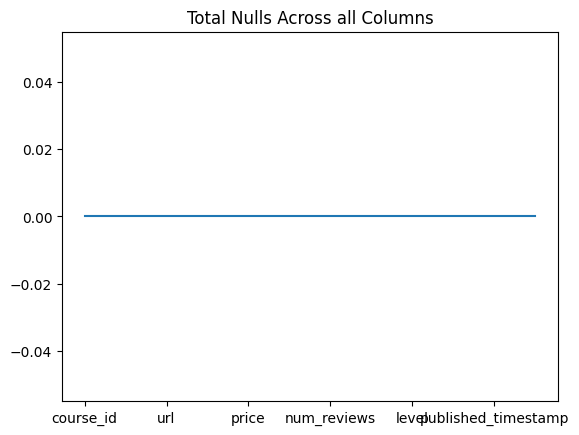

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title("Total Nulls Across all Columns")
df.isnull().sum().plot()

In [5]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [6]:
df.drop(columns=['course_id', 'course_title', 'url'],inplace=True)

In [7]:
df.head()

,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [8]:
df['published_timestamp']=pd.to_datetime(df['published_timestamp'])

In [9]:
df['Month']=df['published_timestamp'].dt.month
df.drop(columns=['published_timestamp'],inplace=True)

In [10]:
df.head()

,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,Month
0,True,200,2147,23,51,All Levels,1.5,Business Finance,1
1,True,75,2792,923,274,All Levels,39.0,Business Finance,3
2,True,45,2174,74,51,Intermediate Level,2.5,Business Finance,12
3,True,95,2451,11,36,All Levels,3.0,Business Finance,5
4,True,200,1276,45,26,Intermediate Level,2.0,Business Finance,12


<Axes: >

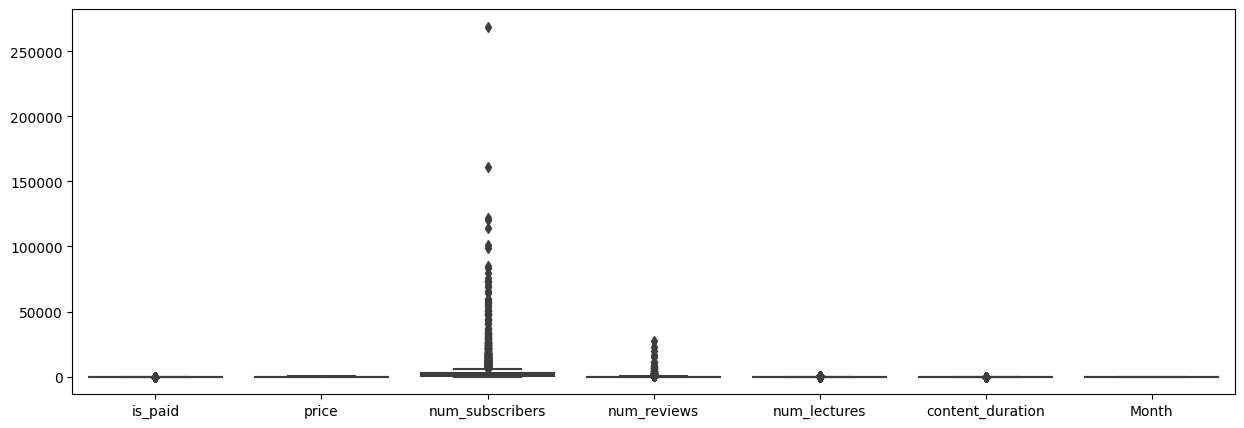

In [11]:
plt.figure(figsize=(15,5))
sns.boxplot(df)

In [12]:
df.columns

Index(['is_paid', 'price', 'num_subscribers', 'num_reviews', 'num_lectures',
       'level', 'content_duration', 'subject', 'Month'],
      dtype='object')

In [13]:
def remove_outliers(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the DataFrame to remove outliers
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

cols= [ 'price', 'num_subscribers', 'num_reviews', 'num_lectures','content_duration']
for col in cols:
    df=remove_outliers(df,col)

<Axes: >

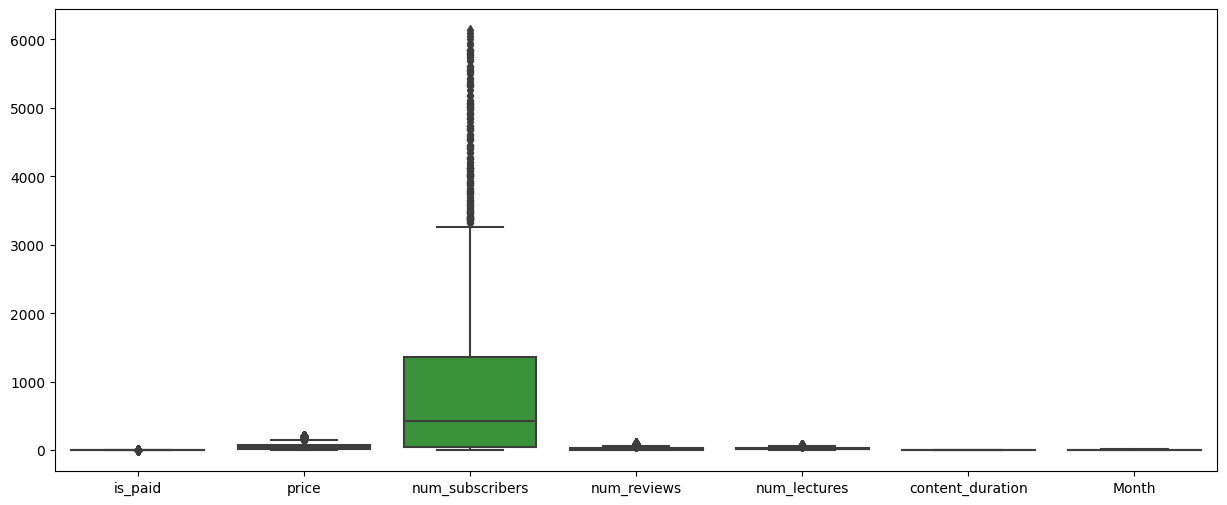

In [14]:
plt.figure(figsize=(15,6))
sns.boxplot(df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_stats/counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
/opt/conda/lib/python3.10/site-packages/seaborn/_stats/counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/cond

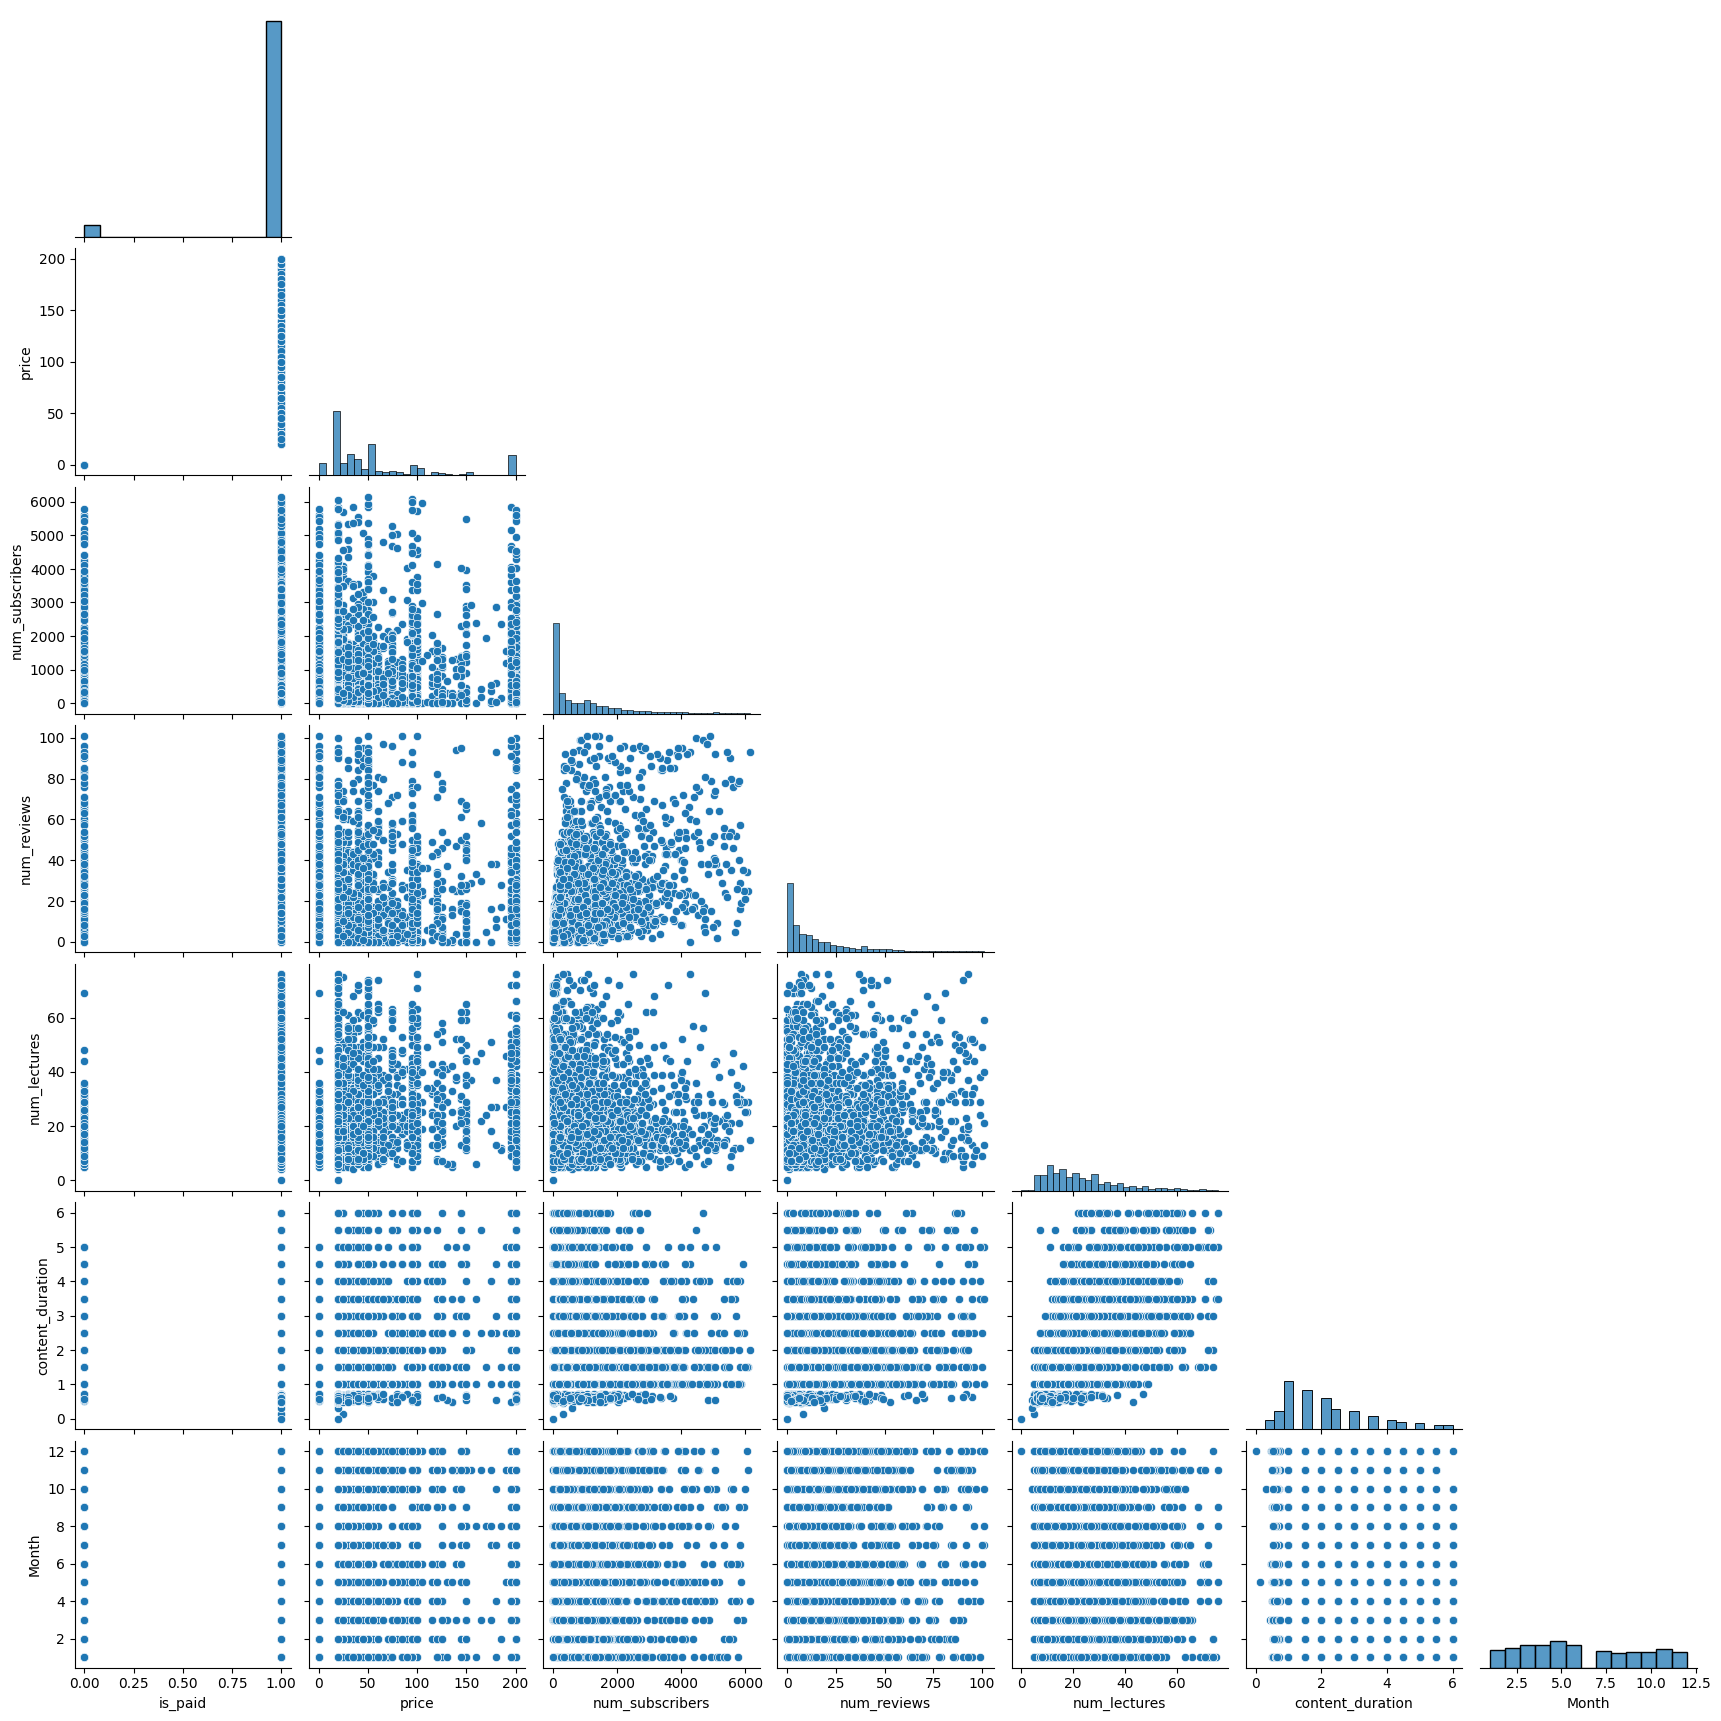

In [15]:
sns.pairplot(df,corner=True)

In [16]:
df1= df.groupby("is_paid").agg({"num_subscribers":'sum'}).reset_index()

<Axes: xlabel='is_paid', ylabel='num_subscribers'>

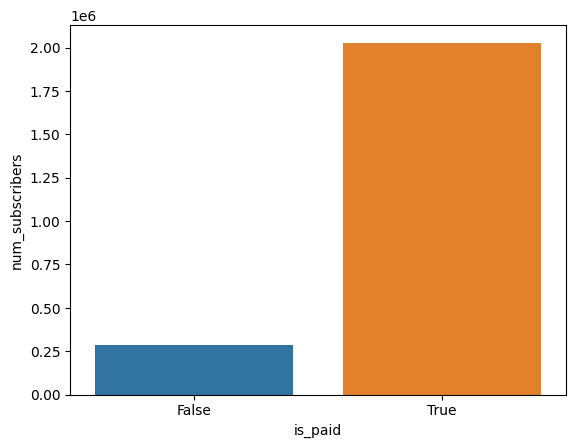

In [17]:
sns.barplot(data=df1,x='is_paid',y='num_subscribers')

In [18]:
df.is_paid.value_counts()

is_paid
True     2339
False     127
Name: count, dtype: int64

In [19]:
df.columns

Index(['is_paid', 'price', 'num_subscribers', 'num_reviews', 'num_lectures',
       'level', 'content_duration', 'subject', 'Month'],
      dtype='object')

<Axes: xlabel='price', ylabel='num_subscribers'>

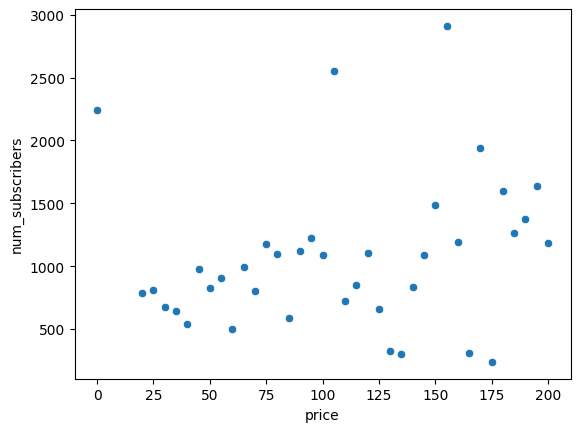

In [20]:
df1=df.groupby('price').agg({'num_subscribers':'mean'}).reset_index()
sns.scatterplot(data=df1,x='price',y='num_subscribers')

<Axes: xlabel='num_reviews', ylabel='num_subscribers'>

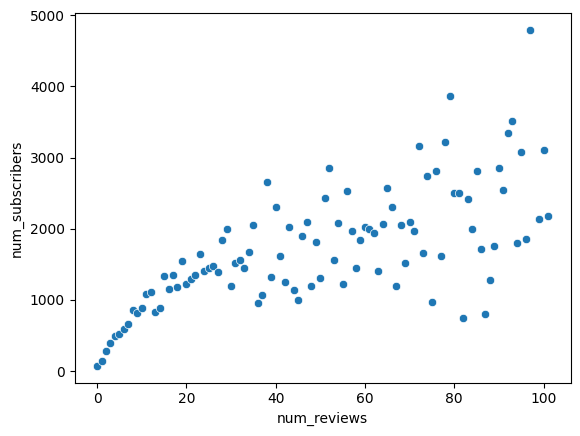

In [21]:
df1=df.groupby('num_reviews').agg({'num_subscribers':'mean'}).reset_index()
sns.scatterplot(data=df1,x='num_reviews',y='num_subscribers')

<Axes: xlabel='num_lectures', ylabel='num_subscribers'>

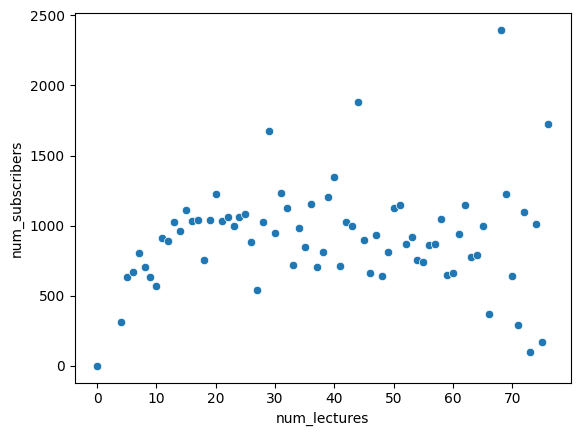

In [22]:
df1=df.groupby('num_lectures').agg({'num_subscribers':'mean'}).reset_index()
sns.scatterplot(data=df1,x='num_lectures',y='num_subscribers')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='level', ylabel='num_subscribers'>

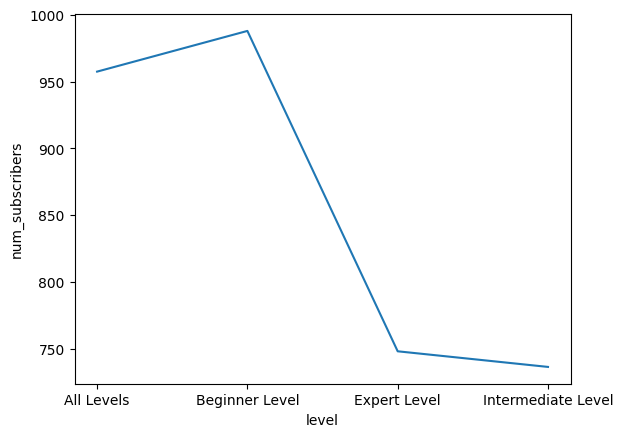

In [23]:
df1=df.groupby('level').agg({'num_subscribers':'mean'}).reset_index()
sns.lineplot(data=df1,x='level',y='num_subscribers')

<Axes: xlabel='content_duration', ylabel='num_subscribers'>

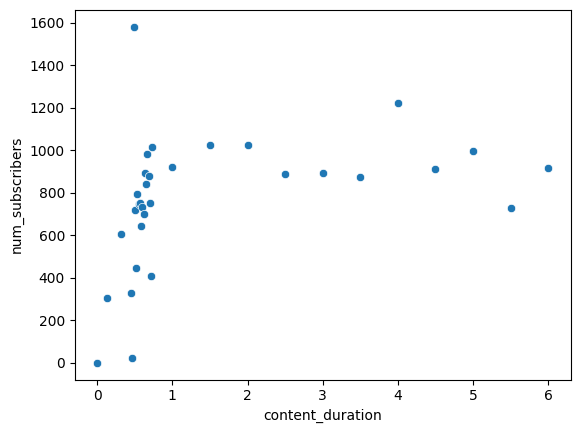

In [24]:
df1=df.groupby('content_duration').agg({'num_subscribers':'mean'}).reset_index()
sns.scatterplot(data=df1,x='content_duration',y='num_subscribers')

<Axes: xlabel='Month', ylabel='num_subscribers'>

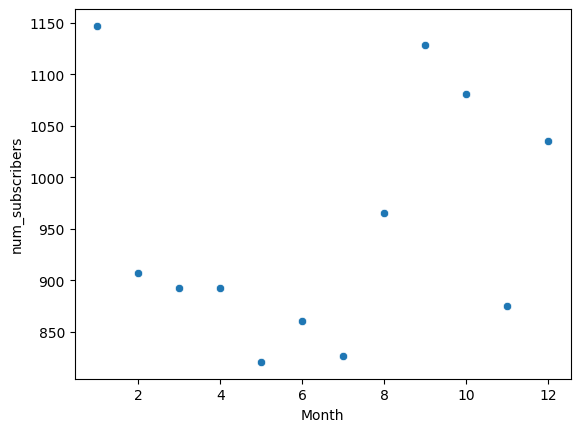

In [25]:
df1=df.groupby('Month').agg({'num_subscribers':'mean'}).reset_index()
sns.scatterplot(data=df1,x='Month',y='num_subscribers')

<Axes: xlabel='subject', ylabel='num_subscribers'>

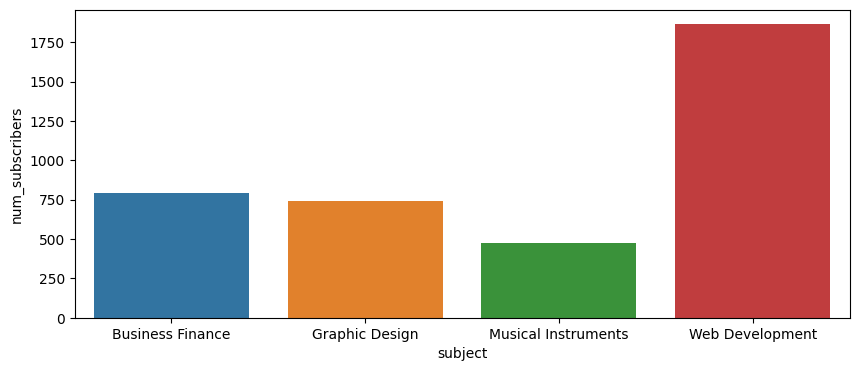

In [26]:
df1=df.groupby('subject').agg({'num_subscribers':'mean'}).reset_index()
plt.figure(figsize=(10,4))
sns.barplot(data=df1,x='subject',y='num_subscribers')

# INFERENCES

- There is a high level of imbalance between courses that are free & paid.
- As the price of course increases, number of subscribers increase. This is probably due to the quality of course.
- Greater the reviews, greater the number of subscribers
- Number of lectures is less or very high leads to decrease in subscriber count
- All Levels & Beginner Level Courses get high subscribers, intermediate and expert levels get less subscribers
- Content Duration does not have much impact of number of subscribers. However, very low content duration does not gain subscribers
- If the course is released during End of Year ( November, December or January), course gets high number of subscribers. This may be due to Vacations, or New Year Resolutions of Studying more. HAHAHAHA :D
- Web Development gets most subscribers, whereas musical instruments related courses get the least.

## Correlation between values

In [27]:
df.dtypes

is_paid                bool
price                 int64
num_subscribers       int64
num_reviews           int64
num_lectures          int64
level                object
content_duration    float64
subject              object
Month                 int32
dtype: object

<Axes: >

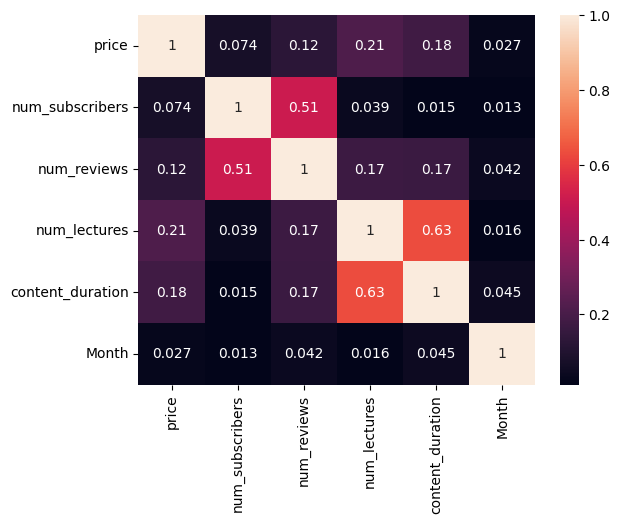

In [28]:
numeric = list(df.select_dtypes(include=['int64','float64','int32']).columns)
sns.heatmap(df[numeric].corr().abs(),annot=True)

In [29]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create a contingency table
contingency_table = pd.crosstab(df['subject'], df['num_subscribers'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}, p-value: {p}")

Chi-square statistic: 4341.291658942726, p-value: 4.257146944127034e-05


In [30]:
contingency_table = pd.crosstab(df['level'], df['num_subscribers'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}, p-value: {p}")

Chi-square statistic: 3699.5120057890026, p-value: 0.9993694646960648


In [31]:
# content_duration and num_lectures are correlated, we can drop content_duration.
df.drop(columns=['content_duration'],inplace=True)

In [32]:
df.head()

,is_paid,price,num_subscribers,num_reviews,num_lectures,level,subject,Month
0,True,200,2147,23,51,All Levels,Business Finance,1
2,True,45,2174,74,51,Intermediate Level,Business Finance,12
3,True,95,2451,11,36,All Levels,Business Finance,5
4,True,200,1276,45,26,Intermediate Level,Business Finance,12
8,True,195,5172,34,38,Expert Level,Business Finance,5


## Data Encoding

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
numeric.remove("num_subscribers")
numeric.remove("content_duration")

transformer = ColumnTransformer([

    ("scaler",StandardScaler(),numeric),
    ("encoder",OneHotEncoder(),['level','subject'])
],remainder='passthrough')

In [34]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['num_subscribers'])
Y=df['num_subscribers']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

In [35]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [36]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor

In [37]:
models = {

    "Lasso":Lasso(),
    "Linear":LinearRegression(),
    "DecisionTree":DecisionTreeRegressor(),
    "Adaboost":AdaBoostRegressor(),
    "Bagging":BaggingRegressor(),
    "GradientBoost":GradientBoostingRegressor(),
    "RandomForest":RandomForestRegressor()
}




In [38]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2=[]
mae = []
mse=[]
names=[]
for name,model in models.items():
    model.fit(X_train_transformed,Y_train)
    ypred = model.predict(X_test_transformed)
    r2.append(r2_score(Y_test,ypred))
    mae.append(mean_absolute_error(Y_test,ypred))
    mse.append(mean_squared_error(Y_test,ypred))
    names.append(name)

In [39]:
results = pd.DataFrame()
results["Name"]=names
results['Mean Absolute Error']=mae
results['Mean Squared Error']=mse
results['r2 Score']=r2

In [40]:
results

,Name,Mean Absolute Error,Mean Squared Error,r2 Score
0,Lasso,675.648526,8.764624e+05,0.351614
1,Linear,674.670577,8.763583e+05,0.351691
2,DecisionTree,848.657212,1.864102e+06,-0.379019
3,Adaboost,779.289508,1.092837e+06,0.191544
4,Bagging,691.034605,1.041617e+06,0.229436
5,GradientBoost,646.842142,8.524098e+05,0.369407
6,RandomForest,666.263718,9.250128e+05,0.315697


### Our best r2 score is 0.32 , let us use PCA to check if we can reduce the dimensionality to include only relevant features

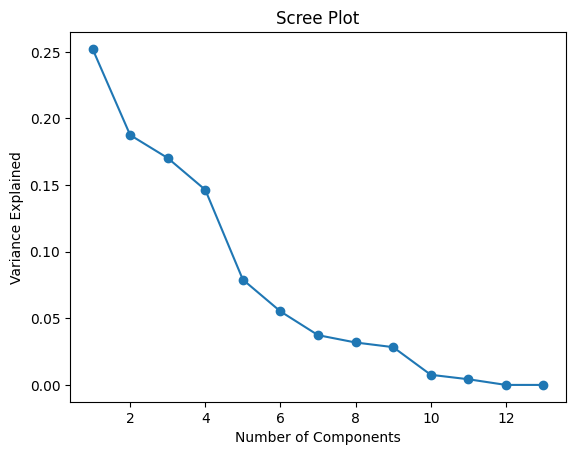

In [41]:
from sklearn.decomposition import PCA

# Fit PCA
pca = PCA().fit(X_train_transformed)  # X is your data matrix

# Calculate cumulative variance explained by each component
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained")
plt.title("Scree Plot")
plt.show()

## Based on the above spree graph, a component value = 7 is the optimal number of components that we should take

In [42]:
pca = PCA(n_components = 7)
X_train_transformed_pca = pca.fit_transform(X_train_transformed)
X_test_transformed_pca = pca.transform(X_test_transformed)

In [43]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2=[]
mae = []
mse=[]
names=[]
for name,model in models.items():
    model.fit(X_train_transformed_pca,Y_train)
    ypred = model.predict(X_test_transformed_pca)
    r2.append(r2_score(Y_test,ypred))
    mae.append(mean_absolute_error(Y_test,ypred))
    mse.append(mean_squared_error(Y_test,ypred))
    names.append(name)

In [44]:
results = pd.DataFrame()
results["Name"]=names
results['Mean Absolute Error']=mae
results['Mean Squared Error']=mse
results['r2 Score']=r2
results

,Name,Mean Absolute Error,Mean Squared Error,r2 Score
0,Lasso,724.498526,9.511428e+05,0.296367
1,Linear,724.390146,9.519000e+05,0.295807
2,DecisionTree,907.035656,2.042036e+06,-0.510651
3,Adaboost,900.457917,1.175703e+06,0.130243
4,Bagging,680.719976,9.618786e+05,0.288425
5,GradientBoost,681.044616,9.049949e+05,0.330506
6,RandomForest,671.266725,8.975812e+05,0.335990


### Our r2 score does not improve much yet. Let me take only those values which are more correlated with target variable.

The only feature that shows better correlation with target variable num_subscribers is num_reviews and price. Let us use only these two variables for training the model

In [45]:
from sklearn.model_selection import train_test_split

X = df[['num_reviews','price','subject']]
Y=df['num_subscribers']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)
transformer = ColumnTransformer([

    ("scaler",StandardScaler(),['num_reviews','price']),
    ("encoder",OneHotEncoder(),['subject'])
   
],remainder='passthrough')
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2=[]
mae = []
mse=[]
names=[]
for name,model in models.items():
    model.fit(X_train_transformed,Y_train)
    ypred = model.predict(X_test_transformed)
    r2.append(r2_score(Y_test,ypred))
    mae.append(mean_absolute_error(Y_test,ypred))
    mse.append(mean_squared_error(Y_test,ypred))
    names.append(name)
results = pd.DataFrame()
results["Name"]=names
results['Mean Absolute Error']=mae
results['Mean Squared Error']=mse
results['r2 Score']=r2
results

,Name,Mean Absolute Error,Mean Squared Error,r2 Score
0,Lasso,702.942927,9.696372e+05,0.272003
1,Linear,702.750405,9.705732e+05,0.271301
2,DecisionTree,873.410906,1.926735e+06,-0.446579
3,Adaboost,774.469122,1.066803e+06,0.199052
4,Bagging,706.907761,1.156694e+06,0.131562
5,GradientBoost,664.442773,9.568363e+05,0.281614
6,RandomForest,707.572808,1.108662e+06,0.167624
